In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cvp
import CSSS as CSSS

%matplotlib inline

In [2]:
## Create an example case where we separate two signals based on sin functions. 
N = 10

X1 = np.sin(np.arange(N)*2*np.pi/N)*50
Y1 = X1 + np.random.normal(0,4,N) + 10


X2 = np.array([5*elem/100+2 for elem in range(0,N)])
Y2 = X2 + np.random.normal(0,5,N)

Y = Y1 + Y2 


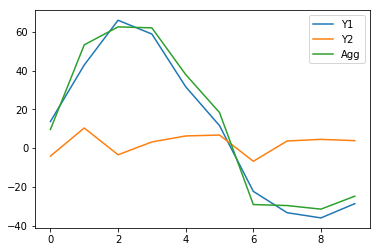

In [3]:
plt.plot(Y1,label='Y1')
plt.plot(Y2,label='Y2')


plt.plot(Y,label='Agg')
plt.legend()

In [4]:
# Try it out. 
CSSEtry = CSSS.CSSS(Y)  ## Instantiate model with aggregate signal, Y
CSSEtry.addSource(np.vstack((np.ones((1,N)),X1)).transpose(), alpha = 1, name = 'Y1')  ## Add a model for Y1
CSSEtry.addSource(X2, alpha = 1, name = 'Y2') ## Add a model for Y2

## Constrain Y2 to be greater than -1 just to try out the constraints. 
#CSSEtry.addConstraint(CSSEtry.models['Y2']['source'] > -10 )

CSSEtry.constructSolve()

    


Setting theta reg cost to 0
Setting theta reg cost to 0


In [5]:
[dual_obj,norm_resid_equality,y]=CSSEtry.admmSolve(10, MaxIter=100, ABSTOL=0.001, RELTOL=0.01,verbose=True)

Tolarence to aggSignal 0.1286879466664953
Initialized all sources
('iter num', 'norm_resid', 'last_dual_objective')
(1, 19.80120103051318, 11762.665515873825, 1070.4338590164207, 1.983282380711486, 19.80120103051318, 1.2589989461614453)
(2, 13.198739686896994, 1306.9583248310498, 775.4279507556857, 0.6634084120217886, 13.198739686896994, 1.3845268217668019)
(3, 8.799192725501618, 7116.328067759054, 599.3990006825279, 1.5433276845719488, 8.799192725501618, 1.2589989461614453)
(4, 5.867491858890429, 2726.6082778980426, 501.69619766258717, 0.9565784986829066, 5.867491858890429, 1.3146457034216832)
(5, 3.9113575717998503, 5423.704719203075, 451.5264813544848, 1.3477142558628903, 3.9113575717998503, 1.2589989461614453)
(6, 2.6069133602970043, 3523.3797322790733, 427.34275672282774, 1.0870229198331922, 2.6069133602970043, 1.283689301220521)
(7, 1.7376978835796837, 4745.315614552148, 416.14266860431576, 1.2607927081911432, 1.7376978835796837, 1.2589989461614453)
(8, 1.1584112745721398, 3910.0

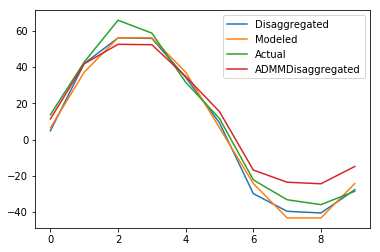

In [6]:
plt.plot(CSSEtry.models['Y1']['source'].value, label = 'Disaggregated')

plt.plot(CSSEtry.models['Y1']['regressor'] * CSSEtry.models['Y1']['theta'].value, label = 'Modeled')
plt.plot(Y1, label = 'Actual')
plt.plot(CSSEtry.models['Y1']['admmSource'], label = 'ADMMDisaggregated')

plt.legend()
plt.show()

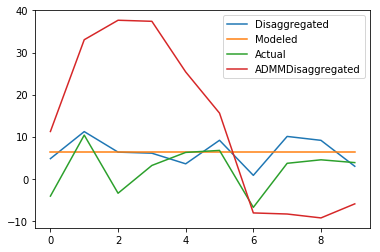

In [7]:
plt.plot(CSSEtry.models['Y2']['source'].value, label = 'Disaggregated')

plt.plot(CSSEtry.models['Y2']['regressor'] * CSSEtry.models['Y2']['theta'].value, label = 'Modeled')
plt.plot(Y2, label = 'Actual')
plt.plot(CSSEtry.models['Y2']['admmSource'], label = 'ADMMDisaggregated')

plt.legend()
plt.show()

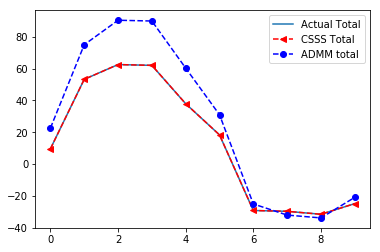

In [8]:
plt.plot(Y, label = 'Actual Total')
plt.plot(CSSEtry.models['Y2']['source'].value+CSSEtry.models['Y1']['source'].value, '--<r',label = 'CSSS Total',)
plt.plot(CSSEtry.models['Y2']['admmSource']+CSSEtry.models['Y1']['admmSource'],'--ob', label = 'ADMM total',)

plt.legend()
plt.show()

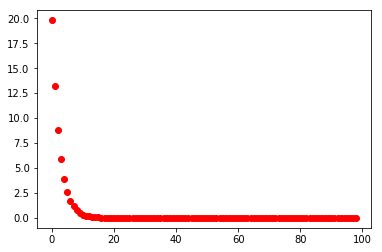

In [9]:
plt.plot(norm_resid_equality,'or')